In [1]:
import math
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import rebound as rb

In [ ]:
"""Intro to Rebound"""

In [ ]:
"""Question 2"""

sim = rb.Simulation()

sim.move_to_com()
sim.integrator = "whfast"

sim.add(m=1, hash="Binary 1")
sim.add(m=1, a=1, e= 0.1, hash="Binary 2", f=np.random.rand()*2*np.pi)
sim.add(a=2.5, e= 0.4, hash="Test Planet", f=np.random.rand()*2*np.pi)

spec_int = np.pi # half of one full orbit

N_orbit = 6*np.pi #3 full orbits

sim.integrate(N_orbit, exact_finish_time=0) #setting flag to integrate up to timestep nearest to endtime
sim.dt = 1e-3

sim.exit_max_distance = 4*1

In [ ]:
sim.status()
# help(rb.Simulation.initSimulationArchive)

In [ ]:
"""Question 3"""

sim2 = rb.Simulation()

sim2.move_to_com()
sim2.integrator = "whfast"

sim2.add(m=1, hash="Binary 1")
sim2.add(m=1, hash="Binary 2", a=1, e=0.5)
sim2.add(hash="Planet", a=4, e=0)

N2_orbit = 10*2*np.pi
sim2.dt = 1e-3

In [ ]:
sim2.status()

In [ ]:
%matplotlib inline

fig = rb.OrbitPlot(sim2)
plt.savefig('orbitalplot.pdf')

In [ ]:
particles2 = sim2.particles
fig, ax = plt.subplots()
ax.plot()

torb = 6*np.pi
Noutputs = 100
times = np.linspace(0, torb, Noutputs)

b1x = []
b1y = []

b2x = []
b2y = []

px = []
py = []


sim2.move_to_com()
for i, time in enumerate(times):
    sim2.integrate(time,exact_finish_time=0)
    b1x.append(particles2[0].x)
    b1y.append(particles2[0].y)
    b2x.append(particles2[1].x)
    b2y.append(particles2[1].y)
    px.append(particles2[2].x)
    py.append(particles2[2].y)

plt.plot(b1x,b1y, color='green')
plt.plot(b2x,b2y, color='cyan')
plt.plot(px,py, color='pink')   
plt.xlabel("x")
plt.ylabel("y")
plt.title("Manual Orbital Plot")

#plt.savefig('manualorbit.png')

In [ ]:
sim2.status()

In [ ]:
#survival_times = []

#def survival(tuple):
#    sim3 = rb.Simulation()
#    sim3.move_to_com()
#    sim3.dt = 1e-3
    
#    N_orbit = (100)*2*np.pi
#    sim3.add(m=1, hash="Binary 1")
#    sim3.add(m=1, a=1, e=tuple[0], hash="Binary 2", f=np.random.rand()*2*np.pi)
#    sim3.add(a=tuple[1], e=0, hash="Test Planet", f=np.random.rand()*2*np.pi)
    
#    sim3.integrate(N_orbit, exact_finish_time=0)
    
#    a_crit = 2.278 + 3.824*tuple[0] - 1.71*(tuple[0])**2
#    sim.exit_max_distance = a_crit
    
#    for num in tuple:
#        if num == round(sim3.particles[1].e, 4): 
#            survival_times.append(sim3.particles[2].P)
        
#        if num == round(sim3.particles[2].a):
#            survival_times.append(sim3.particles[2].P) 
        
#    return survival_times

In [ ]:
"""Classic Results"""

In [2]:
""" Question 1"""

# tuples are of order (e_b, a_p) binary eccentricity 
# and planetary semi-major axis

# function edits 
e_bin = np.linspace(0, 0.7, 5)
a_plan = np.linspace(1, 5, 5)
tup_list = []
for e in e_bin:
    for a in a_plan:
        tup_list.append((e,a))

def test(tuple):
    surv = []
    
    sim3 = rb.Simulation()
    sim3.move_to_com()
    sim3.dt = 1e-3
    
    N_orbit = (100)*2*np.pi
    sim3.add(m=1, hash="Binary 1")
    sim3.add(m=1, a=1, e=tuple[0], hash="Binary 2", f=np.random.rand()*2*np.pi)
    sim3.add(a=tuple[1], e=0, hash="Test Planet", f=np.random.rand()*2*np.pi)
    
    times = np.linspace(0, N_orbit, 25)
    for i, time in enumerate(times):
        sim3.integrate(time, exact_finish_time=0)
        p = sim3.particles[2]
        if p.x**2 + p.y**2 > (100)**2:
            break
        #return time
    
    sim3.integrate(N_orbit, exact_finish_time=0)   
    surv.append(sim3.particles[2].P)
    return surv
# Need to reset simulation so that each run of the same tuple yields the same result

In [3]:
test((0.7,5.0))

[51.20738637054036]

In [ ]:
# mapping = pool.map(func= survival, iterable= tup_list)

In [4]:
%%time
pool = rb.InterruptiblePool()
mapping = pool.map(func= test, iterable= tup_list)
#np.reshape(mapping, [5,5])
print(mapping)

[[-3.970274039276784e-08], [14.530085244173891], [23.136644013394164], [35.56917643821077], [49.83062978908331], [-9.898262158980318], [-6318.76988486505], [22.59612989790554], [35.47676655949624], [49.76573180926372], [-736.8919486290973], [-3.990158007434275], [21.933471938209454], [35.848232586047], [49.424860828176556], [-61.818824798417594], [-25.78751159578366], [-294.9307422550001], [35.15362896072208], [49.19673902075042], [-25.991498324745994], [-81.8465508447484], [218.1681602129326], [35.24006381882363], [47.51936899218835]]
CPU times: user 76 ms, sys: 141 ms, total: 217 ms
Wall time: 5.92 s


In [5]:
mapping

[[-3.970274039276784e-08],
 [14.530085244173891],
 [23.136644013394164],
 [35.56917643821077],
 [49.83062978908331],
 [-9.898262158980318],
 [-6318.76988486505],
 [22.59612989790554],
 [35.47676655949624],
 [49.76573180926372],
 [-736.8919486290973],
 [-3.990158007434275],
 [21.933471938209454],
 [35.848232586047],
 [49.424860828176556],
 [-61.818824798417594],
 [-25.78751159578366],
 [-294.9307422550001],
 [35.15362896072208],
 [49.19673902075042],
 [-25.991498324745994],
 [-81.8465508447484],
 [218.1681602129326],
 [35.24006381882363],
 [47.51936899218835]]

Text(0, 0.5, 'Planetary Semi-Major Axis (a)')

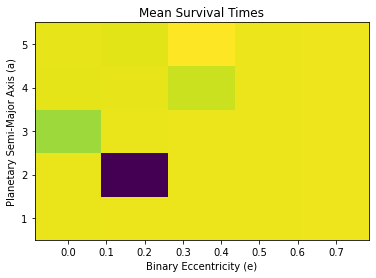

In [18]:
fig = plt.figure()
figure = np.reshape(mapping, [5,5])
plt.pcolormesh(e_bin, a_plan, figure, shading='auto')
plt.title('Mean Survival Times')
plt.xlabel('Binary Eccentricity (e)')
plt.ylabel('Planetary Semi-Major Axis (a)')

Text(0, 0.5, 'Binary Semi-Major Axis (a)')

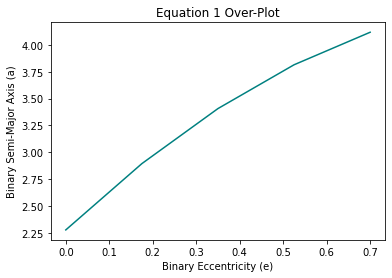

In [17]:
fig = plt.figure()
a_bin = 2.278 + 3.824*e_bin - 1.71*(e_bin**2)
plt.plot(e_bin, a_bin, color='teal')
plt.title('Equation 1 Over-Plot')
plt.xlabel('Binary Eccentricity (e)')
plt.ylabel('Binary Semi-Major Axis (a)')